# Exploratory Data Analysis (EDA) on Food Service Data

**Importing Relevant Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Read the file**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Classroom/Food data.csv')
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


# Data Exploration

**Objective**

Exploring the provided data to understand its structure,shape, data types, and to  identify missing values and value distributions.

The agenda is:

* Correct data types and to locate problematic labels adding to the type
error.
* Locating missing values and choosing relevant method to deal with them by understanding the data distibution in the respective columns.
* Checking for duplicates and dealing with them accordingly.
* Computing the summary statistics for the numerical columns.
* Generating visualizations to explore the data.
* Calculating the correlation matrix between the numerical variables, to better understand the dependency among them.
* Bivariate Analysis


---





In [4]:
print("Shape of Data")
print(df.shape)
print('------------------------------------------------------------')
print("\nInfo. of Data")
display(df.info())

print("\nValue count in data")
for col in df:
  print(f"\nValue count in {col}")
  print(df[col].value_counts())
  print("----------------------------------------------------------")



Shape of Data
(1822, 11)
------------------------------------------------------------

Info. of Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


None


Value count in data

Value count in ID
ID
1821    1
0       1
1       1
2       1
3       1
       ..
18      1
17      1
16      1
15      1
14      1
Name: count, Length: 1822, dtype: int64
----------------------------------------------------------

Value count in date
date
2/2/2022     4
1/11/2022    4
1/27/2022    4
2/14/2022    4
1/6/2022     4
            ..
4/2/2024     2
9/4/2023     2
1/17/2024    2
3/20/2024    2
6/27/2022    2
Name: count, Length: 867, dtype: int64
----------------------------------------------------------

Value count in meals_served
meals_served
259.0     14
352.0     14
485.0     14
291.0     14
198.0     13
          ..
117.0      2
4680.0     1
284.0      1
102.0      1
2080.0     1
Name: count, Length: 373, dtype: int64
----------------------------------------------------------

Value count in kitchen_staff
kitchen_staff
12        143
5         138
10        130
13        127
9         127
15        123
18        121
14        117
7         117
11    



---


# 1. Data Cleaning:

**Fixing inconsistent labels in 'Waste_category'**
* Meat have two labels i.e 'MeAt' and 'MEAT'.
* Lower and Upper case inconsistencies .
* Strip and lower will standardize the labels to one format, which will later be replaced by correct labels using a dictionary.
This method is efficient for smaller number of values.


---



In [5]:
df["waste_category"]=df["waste_category"].str.strip().str.lower()
correct_labels={'dairy':'Dairy','meat':'Meat','vegetables':'Vegetables','grains':'Grains','wheat':'Wheat','barley':'Barley'}
df["waste_category"]=df["waste_category"].map(correct_labels)

In [6]:
df['waste_category'].unique()

array(['Dairy', 'Meat', 'Vegetables', 'Grains', nan, 'Wheat', 'Barley'],
      dtype=object)

**Fixing inconsistent labels in 'Staff_Experience'**

In [7]:
df["staff_experience"]=df["staff_experience"].str.strip().str.lower()
correct_labels1={'beginner':'Beginner','intermediate':'Intermediate','expert':'Expert','pro':'Pro'}
df["staff_experience"]=df["staff_experience"].map(correct_labels1)

In [9]:
df['staff_experience'].unique()

array(['Intermediate', nan, 'Beginner', 'Expert', 'Pro'], dtype=object)

**Fixing inconsistent labels and data type of 'Special_Event'**

* 'Special Event' is a categorical column despite holding integer values. The logic being, only two values ,1 and 0, exisiting ,thus identifying them as categories and not count or numbers.

In [8]:
df['special_event']=df['special_event'].replace('One ','1')
df['special_event'].unique()

array(['0', '1'], dtype=object)

**Data-type  correction of 'Date' to 'datetime' format**

In [9]:
df['date'] = pd.to_datetime(df['date'])

**Data-type correction of 'Kitchen_staff' column:**

* The column consist of numerical values i.e whole numbers,however the respective data type is "object". This misinterpretation of type arises because of presence of two string values,'ten' and 'eleven'. Replacing them with it's integer representation will fix the error.

In [10]:
word_to_num = {

    'ten ': 10,
    'eleven': 11
}

df['kitchen_staff'] = df['kitchen_staff'].replace(word_to_num)
df['kitchen_staff']=pd.to_numeric(df['kitchen_staff'], errors='coerce')

In [11]:
df['kitchen_staff'].unique()


array([13., 15., 16., 19., 10., 18.,  7.,  5., 12.,  8., 17., 11.,  9.,
        6., nan, 14.])

**Check for Missing Values**

In [12]:
df.isnull().sum()

,0
ID,0
date,0
meals_served,32
kitchen_staff,18
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
past_waste_kg,16
staff_experience,337


In [13]:
missing_percentage=(df.isnull().sum()/len(df))*100
print(missing_percentage)

# Null/missing value existence doesn't surpass the 50% mark for any  of the category,thus all columns in question will be kept ,finding relevant methods to deal with missing values after the data distribution assessment.

ID                   0.000000
date                 0.000000
meals_served         1.756312
kitchen_staff        0.987925
temperature_C        0.000000
humidity_percent     0.878156
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.878156
staff_experience    18.496158
waste_category       1.152580
dtype: float64


**Dealing with missing values**



*1. 'Meals_served'  values's histogram exhibits skewed distribution. Imputing the missing values with median will be an ideal approach to deal with it.*

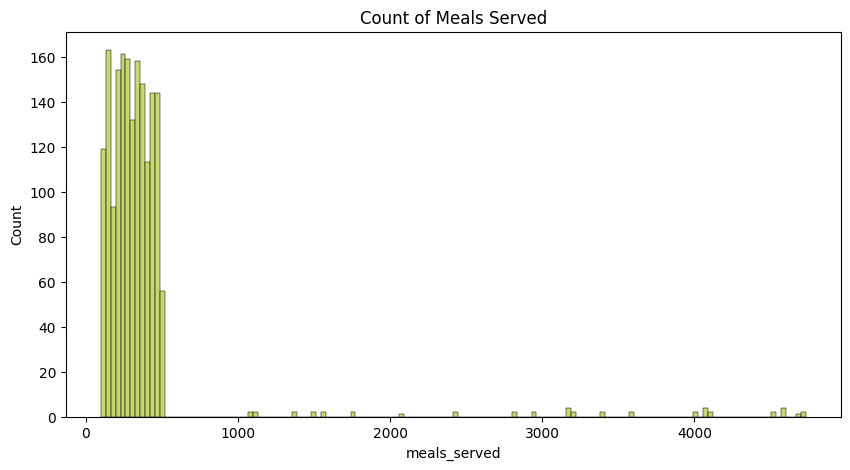

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df["meals_served"],color="#B6CC42")
plt.title("Count of Meals Served")
plt.show()

# the distribution in this histogram is right-skewed (positively skewed).

In [15]:
median_value = df['meals_served'].median()
df['meals_served'] = df['meals_served'].fillna(median_value)

In [16]:
df['meals_served']=pd.to_numeric(df['meals_served'], errors='coerce')

In [18]:
df["meals_served"].isnull().sum()

np.int64(0)

*Plots for rest of the categories with missing values*

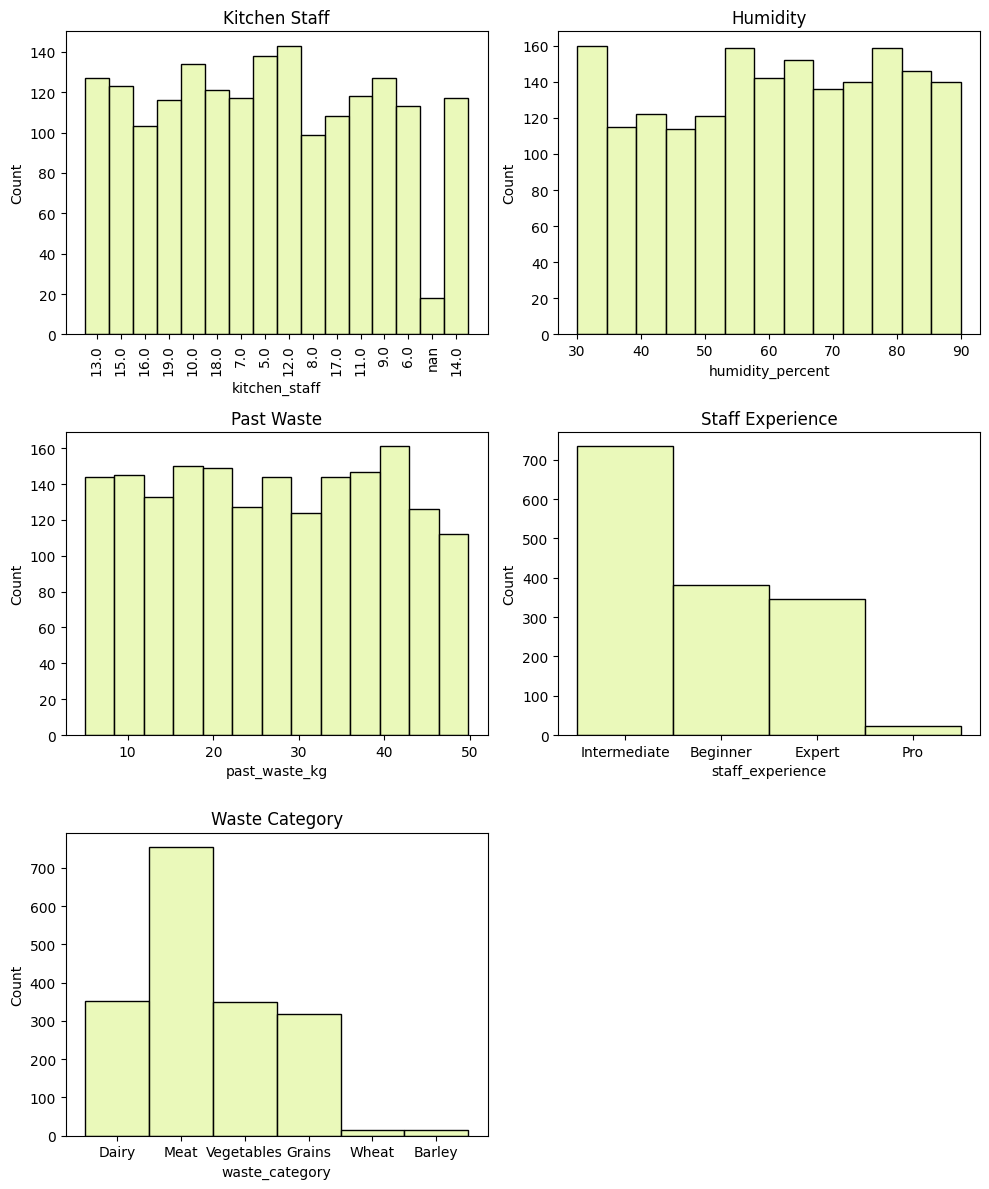

In [19]:
plt.figure(figsize=(10,12))

plt.subplot(3,2,1)
sns.histplot(df["kitchen_staff"].astype(str),color="#E4F8A3",edgecolor="black")
plt.title("Kitchen Staff")
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.histplot(df["humidity_percent"],color="#E4F8A3",edgecolor="black")
plt.title("Humidity")

plt.subplot(3,2,3)
sns.histplot(df["past_waste_kg"],color="#E4F8A3",edgecolor="black")
plt.title("Past Waste")

plt.subplot(3,2,4)
sns.histplot(df["staff_experience"],color="#E4F8A3",edgecolor="black")
plt.title("Staff Experience")

plt.subplot(3,2,5)
sns.histplot(df["waste_category"],color="#E4F8A3",edgecolor="black")
plt.title("Waste Category")

plt.tight_layout()
plt.show()

**Dealing with "Numerical Column's" missing values**




*   All three numerical columns ,"Kitchen_staff", "Humidity_percent" and "Past_waste_kg" are normally distributed.

*  The missing values can be replaced with their respective mean values.





In [20]:
mean_k=df["kitchen_staff"].mean()
mean_h=df["humidity_percent"].mean()
mean_p=df["past_waste_kg"].mean()

In [21]:
df['kitchen_staff'] = df['kitchen_staff'].fillna(mean_k)
df['kitchen_staff']=pd.to_numeric(df['kitchen_staff'], errors='coerce')

df['humidity_percent'] = df['humidity_percent'].fillna(mean_h)
df['past_waste_kg'] = df['past_waste_kg'].fillna(mean_p)


**Dealing with "Categorical Column's" missing values**



*  Both ,'Staff_Experience' & 'Waste_ Category' columns have skewed data distribution.
* 18% of missing values in 'Staff_Experience' is a significant portion.  Simply filling it with the mode  can exaggerate existing skew and mislead models. We will use placeholders instead ,to maintain integrity of data.
* 1.1% missing values in 'Waste_category' can be dealt by replacing it with mode,however since the labels refer to specific food categories, mode might mislead the data. Will replace it with 'unknown' instead.



In [22]:
df['staff_experience']=df['staff_experience'].fillna('Unknown')
df['waste_category']=df['waste_category'].fillna('Unknown')

In [23]:
df['waste_category'].unique()

array(['Dairy', 'Meat', 'Vegetables', 'Grains', 'Unknown', 'Wheat',
       'Barley'], dtype=object)

In [24]:
df.isnull().sum()


,0
ID,0
date,0
meals_served,0
kitchen_staff,0
temperature_C,0
humidity_percent,0
day_of_week,0
special_event,0
past_waste_kg,0
staff_experience,0


**Check for Duplicate Rows**

In [25]:
df.duplicated().sum()
#there are no duplicate rows in the data frame.

np.int64(0)

Downloading Cleaned Data

In [183]:
from google.colab import files
df.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Exploratory Data Analysis (EDA) :

**Summary Statistics**

In [26]:
numerical_cols = df.select_dtypes(include=['number'])
print("\nStatistical Summary for Numerical Columns:")
display(numerical_cols.describe())


Statistical Summary for Numerical Columns:


,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000
mean,910.500000,372.327113,11.904656,22.189280,60.791257,3.01427,26.997534
std,526.110413,490.505492,4.270482,8.919939,17.249947,2.00899,12.735569
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,212.250000,8.000000,15.684259,46.137537,1.00000,16.148956
50%,910.500000,306.000000,12.000000,22.115040,61.514385,3.00000,26.997534
75%,1365.750000,405.750000,15.000000,28.807494,75.755784,5.00000,37.978663
max,1821.000000,4730.000000,19.000000,60.000000,89.982828,6.00000,49.803703


**Visualizing Distributions**

***Histograms:***

To understand the distribution of numerical features like
meals_served, temperature_C, humidity_percent, and past_waste_kg.

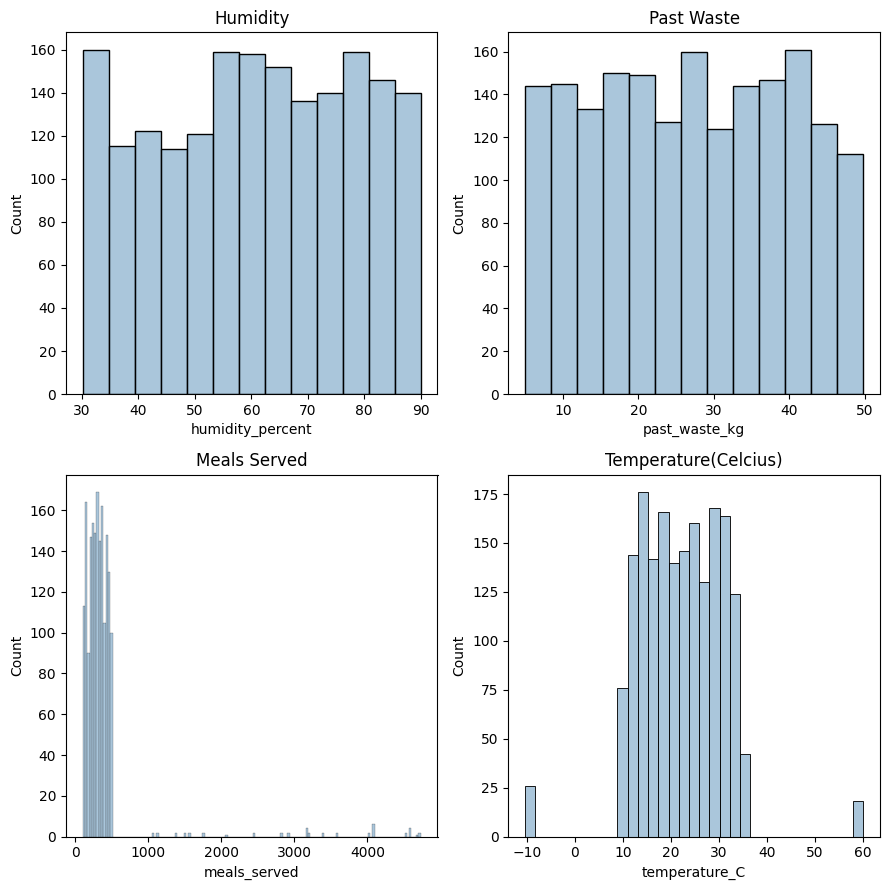

In [29]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
sns.histplot(df["humidity_percent"],color="#8EB4D0",edgecolor="black")
plt.title("Humidity")

plt.subplot(2,2,2)
sns.histplot(df["past_waste_kg"],color="#8EB4D0",edgecolor="black")
plt.title("Past Waste")

plt.subplot(2,2,3)
sns.histplot(df["meals_served"],color="#8EB4D0",edgecolor="black")
plt.title("Meals Served")

plt.subplot(2,2,4)
sns.histplot(df["temperature_C"],color="#8EB4D0",edgecolor="black")
plt.title("Temperature(Celcius)")

plt.tight_layout()
plt.show()



---


* **'Humidity'**, **'Past Waste'**, and **'Temprature'** plots exhibits normal distribution of data, however **'Meals Served'** is right skewed.

* **Temprature C** have two values at extreme ends,-10 C and 60 C.The logical explanation to the outliers,might be associated to special occasions or storage required for a huge order,however the values does not seem sane or coherent considering it to be uncommon storage temparture.bold text

* Evident presence of outliers in **'Meals Served'** and **'Temprature_C'**.


---



**Boxplots:**

 To detect outliers and understand the spread of the data.

In [30]:
# Separated numerical columns,excluded out columns that requires integrity of it's data to remain intact.
numerical = df.drop(['ID','day_of_week','kitchen_staff'], axis=1)
numerical = numerical.select_dtypes(include=['number'])

# Count of outliers in each numerical column
for col in numerical:
  Q1=numerical[col].quantile(0.25)
  Q3=numerical[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=numerical[(numerical[col]<lower_bound) | (numerical[col]>upper_bound)]
  print(f"\n Count of Outliers in {col}: {len(outliers)}\n")
  print('-----------------------------------------------')




 Count of Outliers in meals_served: 46

-----------------------------------------------

 Count of Outliers in temperature_C: 44

-----------------------------------------------

 Count of Outliers in humidity_percent: 0

-----------------------------------------------

 Count of Outliers in past_waste_kg: 0

-----------------------------------------------


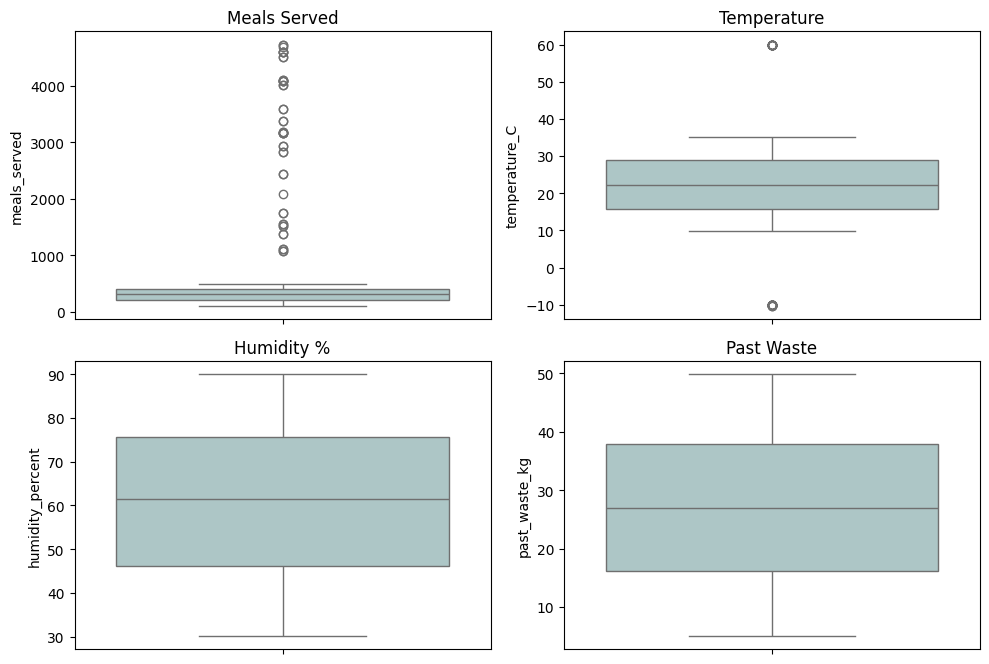

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.boxplot(df['meals_served'],color='#A9CACA')
plt.title('Meals Served')

plt.subplot(3,2,2)
sns.boxplot(df['temperature_C'],color='#A9CACA')
plt.title('Temperature')

plt.subplot(3,2,3)
sns.boxplot(df['humidity_percent'],color='#A9CACA')
plt.title('Humidity %')

plt.subplot(3,2,4)
sns.boxplot(df['past_waste_kg'],color='#A9CACA')
plt.title('Past Waste')

plt.tight_layout()
plt.show()

* Most values in **'Meals Served'** are below 1000, but there are several outliers reaching up to 4000.

* The central range in **'Temprature_C'** is around 15°C to 30°C, with extreme values surpassing 50°C and dipping below -10°C.


---



**Dealing with outliers**


---
***Meals Served***

 * A significant number of data points for meals_served are above 1000, it's likely that those aren't errors but actual high-volume days. In that case, removing or capping them might throw away important data input.

 * Using log transformation to compress the high-end values while keeping relative differences.





In [32]:
df['meals_served'] = np.log1p(df['meals_served'])


***Temprature(Celcius)***

* Extreme values (like the one around –10°C or 60°C ) are likely errors or rare cases not common in most real-world ambient conditions.

* Will clip the outliers with lower and upper bound values.

In [33]:
    Q1 = df['temperature_C'].quantile(0.25)
    Q3 = df['temperature_C'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR

    df['temperature_C'] = df['temperature_C'].clip(lower_bound, upper_bound)


**Bar plots:**

 To visualize categorical variables:
 * Staff_Experience
 * Waste_Category

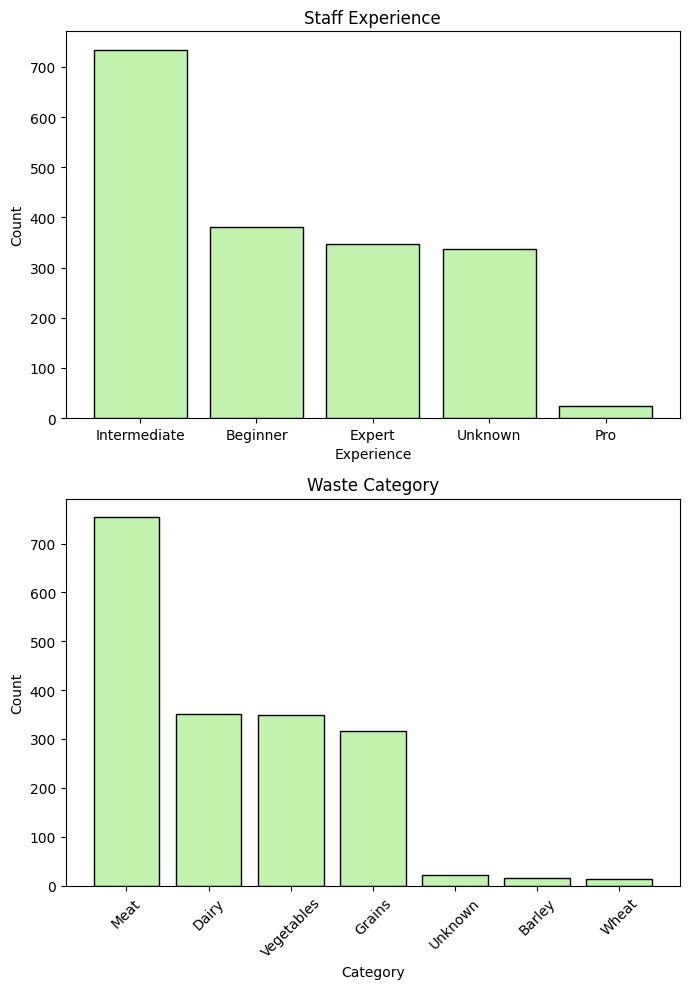

In [34]:
plt.figure(figsize=(6,9))

plt.subplot(2,1,1)

plt.bar(x=df['staff_experience'].value_counts().index, height=df['staff_experience'].value_counts().values, color='#C2F3AE',edgecolor='black')
plt.title('Staff Experience')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.subplot(2,1,2)

plt.bar(x=df['waste_category'].value_counts().index, height=df['waste_category'].value_counts().values, color='#C2F3AE',edgecolor='black')
plt.title('Waste Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



---


* ***Staff Experience*** :

Employees with 'Intermediate' level of experience are preferred more as compared to beginners and experts.
Indicating,that in this food service moderate experience is providing efficient work flow while maintaining the adaptibility to be flexible as per demands.

* ***Waste Category*** :
The highest waste contributor is Meat , followed by Dairy and Vegetables.


---



# Correlation Analysis

In [35]:
df.corr(numeric_only=True)

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,past_waste_kg
ID,1.000000,-0.013240,-0.014420,0.024219,0.003047,0.014446,0.018884
meals_served,-0.013240,1.000000,-0.035278,-0.023005,-0.036193,-0.000601,0.002062
kitchen_staff,-0.014420,-0.035278,1.000000,-0.019676,-0.016129,0.034120,-0.082218
temperature_C,0.024219,-0.023005,-0.019676,1.000000,-0.005471,0.023725,-0.020392
humidity_percent,0.003047,-0.036193,-0.016129,-0.005471,1.000000,0.017706,0.014946
day_of_week,0.014446,-0.000601,0.034120,0.023725,0.017706,1.000000,0.000465
past_waste_kg,0.018884,0.002062,-0.082218,-0.020392,0.014946,0.000465,1.000000


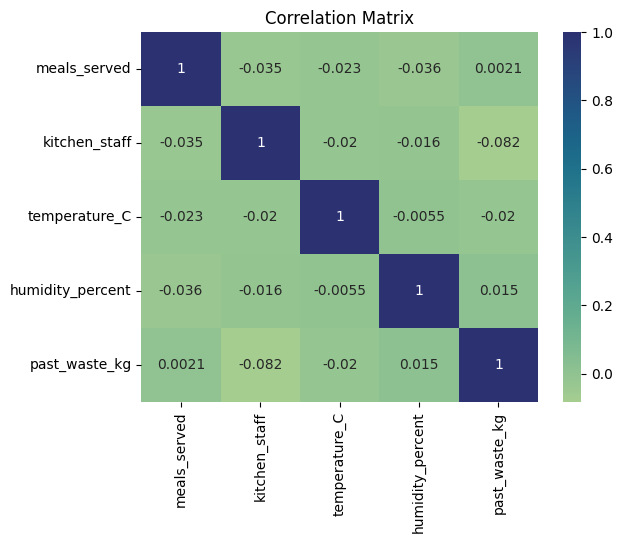

In [36]:
correlation_matrix = df.drop(columns=['ID','day_of_week','date']).corr(numeric_only=True)

sns.heatmap(correlation_matrix,annot=True,cmap="crest")
plt.title("Correlation Matrix")
plt.show()

The coefficients range from -1 to 1, indicating the strength and direction of correlations.


---
**Weak Correlations :**

 The correlation values range between -0.082 and 0.015, indicating that there are no strong linear relationships between the variables. Thus suggesting that changes in one factor (like temperature or meals served) do not significantly affect others.


---



#  Hypothesis Testing

**Impact of Kitchen Staff on Food Waste**

We will test whether the number of kitchen staff affects the amount of food waste.

 One hypothesis could be:
 * *Null hypothesis (H0)*: There is no relationship between the number of kitchen staff and food waste.

* *Alternative hypothesis (H1)*: The number of kitchen staff significantly affects food waste.

In [37]:

df['kitchen_staff']=round(df['kitchen_staff'])
df['kitchen_staff'].unique()

array([13., 15., 16., 19., 10., 18.,  7.,  5., 12.,  8., 17., 11.,  9.,
        6., 14.])

In [38]:
# Categorize Kitchen Staff

def categorize_staff(n):
    if n <= 5:
        return 'Low'
    elif n <= 10:
        return 'Medium'
    else:
        return 'High'

df['staff_level'] = df['kitchen_staff'].apply(categorize_staff)

# import spicy stats and run One-Way ANOVA

import scipy.stats as stats

#  create three separate lists:
# All food waste values when staff was low
# All values when staff was medium
#All values when staff was high

low = df[df['staff_level'] == 'Low']['past_waste_kg']
medium = df[df['staff_level'] == 'Medium']['past_waste_kg']
high = df[df['staff_level'] == 'High']['past_waste_kg']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(low, medium, high)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")



F-statistic: 4.16
P-value: 0.0158


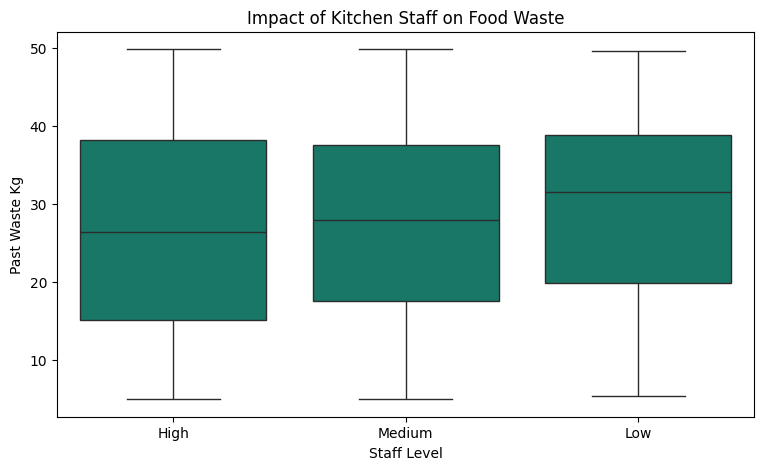

In [67]:
plt.figure(figsize=(9,5))
sns.boxplot(x='staff_level',y='past_waste_kg',data=df,color='#0a8671')
plt.xlabel("Staff Level")
plt.ylabel("Past Waste Kg")
plt.title('Impact of Kitchen Staff on Food Waste')
plt.show()

 ***ANOVA Results:***

F-statistic = 4.16 means there's some variation in food waste between the groups.

P-value  is less than 0.05, which means the result is statistically significant.

 *Conclusion:*

Rejecting the null hypothesis (H₀).
* There is a  difference in average food waste between at least one of the  groups (Low, Medium, or High).


---



**Special Events and Food Waste**

We will test whether food waste increases during special events:

* *Null hypothesis (H0):* There is no difference in food waste during special event days and no special event days.

* *Alternative hypothesis (H1):* Food waste is more on special event days.

We will perform a t-test comparing the average food waste on days with and without special event.


In [39]:
from scipy.stats import ttest_ind

# Create two groups
event_days = df[df['special_event'] == '1']['past_waste_kg']
non_event_days = df[df['special_event'] == '0']['past_waste_kg']

# Perform one-sided t-test
t_stat, p_value = ttest_ind(event_days, non_event_days, alternative='greater')


print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.28
P-value: 0.3881


***T-Test Result:***


T-statistic = 0.28 states that the difference between group means is small.

P-value = 0.3881  is much greater than 0.05, which means the result is not significant.

 *Conclusion:*

 * Null Hypothesis seems valid here,thus proving that special event days have no effect on food waste.


---






# Bivariate and Multivariate Analysis:


---
Plotting variables against each other for detailed speculation of correlation and dependencies


---
***Humidity VS Food wastage***




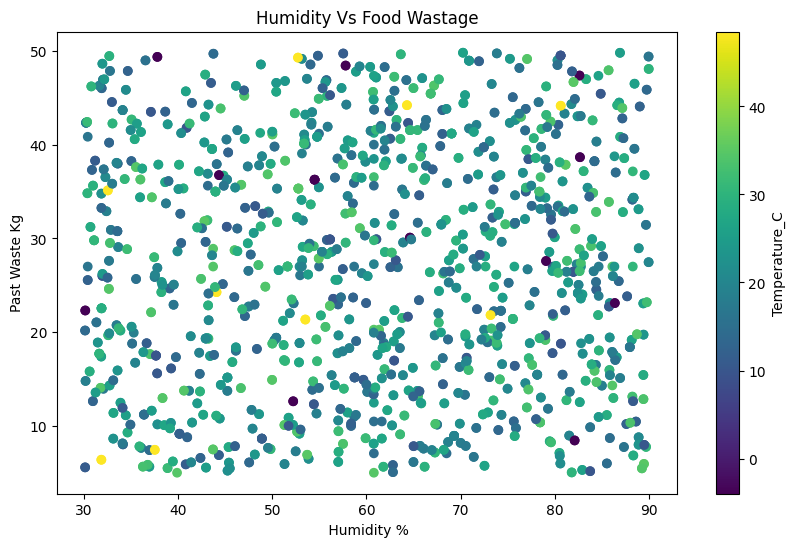

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(x='humidity_percent', y='past_waste_kg',data=df,c=df['temperature_C'])
plt.xlabel(" Humidity %")
plt.ylabel("Past Waste Kg")
plt.title("Humidity Vs Food Wastage")
plt.colorbar(label='Temperature_C') # Adding a colorbar to show temperature scale
plt.show()

* The data points are spread across the graph , indicating no obvious correlation between humidity and food wastage.

* The temperature gradient suggests that warmer temperatures  and cooler temperatures are evenly distributed across all humidity levels. This implies that temperature does not significantly impact food waste.

***Meals Served VS Special Event***

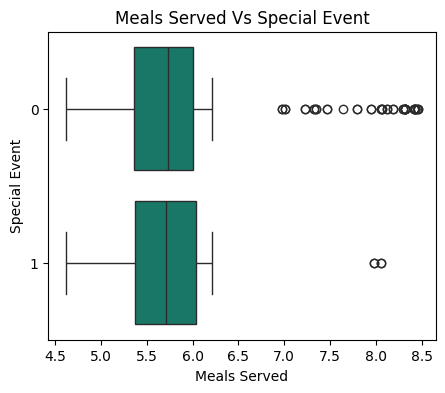

In [57]:
plt.figure(figsize=(5,4))
sns.boxplot(x='meals_served',y='special_event',data=df,color='#0a8671')
plt.xlabel("Meals Served")
plt.ylabel("Special Event")
plt.title('Meals Served Vs Special Event')
plt.show()



---
* Both special and non-special events have a median of around 6 meals served.
*Non-special events (0) have more outliers, especially above 7 meals served.

* Special events (1) have fewer outliers, but a few above 8 meals, indicating occasional higher meal counts.


---



***Day of Week VS Meals Served***

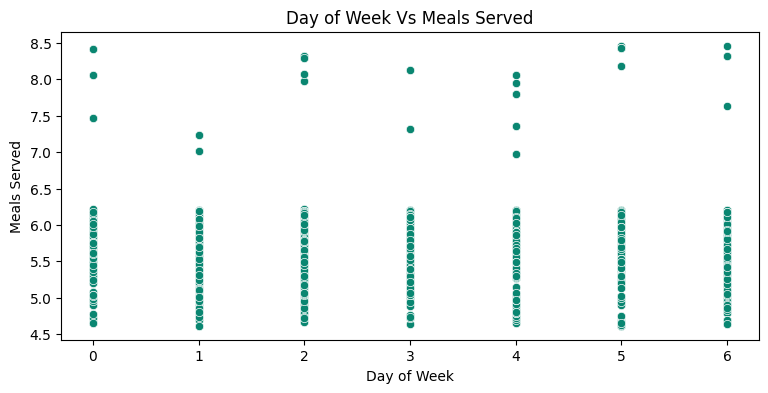

In [65]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='day_of_week',y='meals_served',data=df,color='#0a8671')
plt.xlabel("Day of Week")
plt.ylabel("Meals Served")
plt.title('Day of Week Vs Meals Served')
plt.show()



---
* No drasctic day to day observation shown.Count of meals served throughout the week ranges between 4 to 6,while few outliers extending upto 8 and 8.5.

* Some days have outlier points, suggesting occasional surges in meals served.


# Key Insights and Recommendations:


---
**Key Insights**
1. ***Environmental Factors:***

* No Clear Trend was observed between *Humidity* and *Past Waste*,thus indicating no obvious correlation between humidity and food wastage.

* The *Temperature* gradient suggests that warmer temperatures and cooler temperatures  are evenly distributed across all *Humidity levels*. This implies that temperature does not significantly impact food waste in a significant manner.

2. ***Event Management:***

* There is no significant difference between *Average meals* served on event and non-event days.

* The clustering of outliers on the right suggests that a few days had unusually high meals, probably big events or peak days.

* Significant surge in *Meal count* was observed during weekends.

3. ***Staffing Optimization***

*  The correlation between kitchen staff and meals served is towards the lower value, indiacting that the number of meals prepared does not  scale directly with staff numbers

* The median waste remains around 30 kg across all staff levels, suggesting that kitchen staffing does not strongly influence food waste







---
**Recommendations**

1. ***Staffing Adjustments Might Not Reduce Waste***: Since staff level doesn't strongly impact waste, optimizing staff based on efficiency and experience rather than waste reduction may be more beneficial.

2. ***Investigate Factors contributing in Food wastage***: Factors such as meal demand , inventory management, and special events might contribute more to waste variations than kitchen staff count.

3. ***Demand Forecasting & Meal Planning***:
Use historical meal service trends (day of the week, special events, seasonal patterns) to predict demand more accurately.



4. ***Explore Waste Reduction Strategies***: Since waste levels remain similar across staff levels, efforts should be focused on improving menu planning, portion control, and food repurposing methods to minimize wastage. Professional with expertise in professional kitchen are required to be hired to better deal with food flow and waste output.

5. ***Promotions***
  *   Offer discounts on frequently ordered meals to reduce waste and attract customers.

   * Create loyalty programs rewarding returning customers with discounts or free meals.

6. ***Implementation of automated tracking systems***

   Implement automated tracking systems for meal production and waste to refine operational strategies.   

7. ***Optimising food storage methods***
   Ensure proper food storage  to minimize spoilage, especially in extreme temperature conditions. A market research might provide productive methods of storage and inventory management.   